# Sentiment_Analysis_Project_Using_NLP

#### Summary: Development of a model that can predict whether the buyers of a certain product are satisfied with the product or not based on their product reviews. In this project natural language processing is going to be utilized to perform sentiment analysis on the given reviews. The project is organized as follows: (a)  data processing and exploratory data analysis, (b) natural language processing and tokenization, (c) development of a Naive Bayes classifier model, (d) development of a logistic regression classifier.

Introduction:
* Natural language processing can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.
* Natural language processors work by converting words into numbers followed by training machine learning models to make predictions.
* That way, it is possible for companies to know if their customers are satisfied or not without manually going through massive numbers of tweets or reviews. 


### In this project the public relations department of Amazon collected extensive data on their customers, such as reviews about their Amazon Alexa product in text format, and wants based on that reviews to predict whether their customers are satisfied with the product or not.  

Data information:
This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

**Comment:** The feeback column can only take binary values. In particular, feeback is equal to 1 when the rating is either 4 or 5 stars otherwise the feedback column is equal to 0.

## 0. Import the required libraries

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Read the dataset

In [3]:
reviews_df=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [4]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**Comment:** Judging from the mean rating of reviews, it seems that the majority of the buyers enjoy the product.

## 2. Dataset exploration

### i) Check if there is any missing values in the dataset

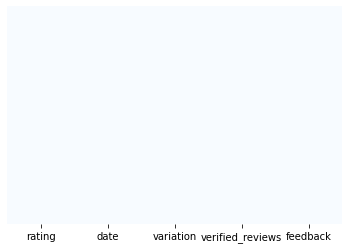

In [8]:
 sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**Comment:** It seems that there is no missing values in the dataset.

### ii) Display the length of messages

In [9]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

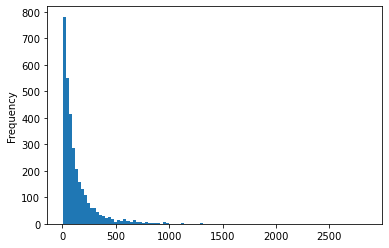

In [10]:
reviews_df['length'].plot(bins=100, kind='hist') 

**Comment:** It seems that most of the messages are short.

### iii) Insightful histograms

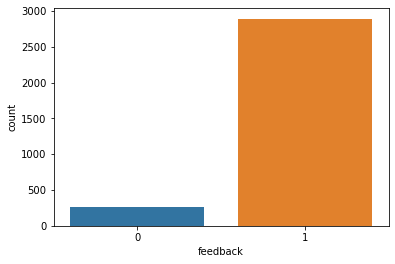

In [11]:
sns.countplot(reviews_df['feedback'], label = "Count") 

**Comment:** It seems that most of the customers have positive feedback about the product.

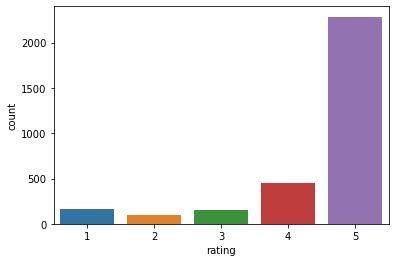

In [12]:
sns.countplot(x = 'rating', data = reviews_df)

**Comment:** The majority of the customers rated the product as 5 stars.

### iv) Check the effect of the different variations of the product

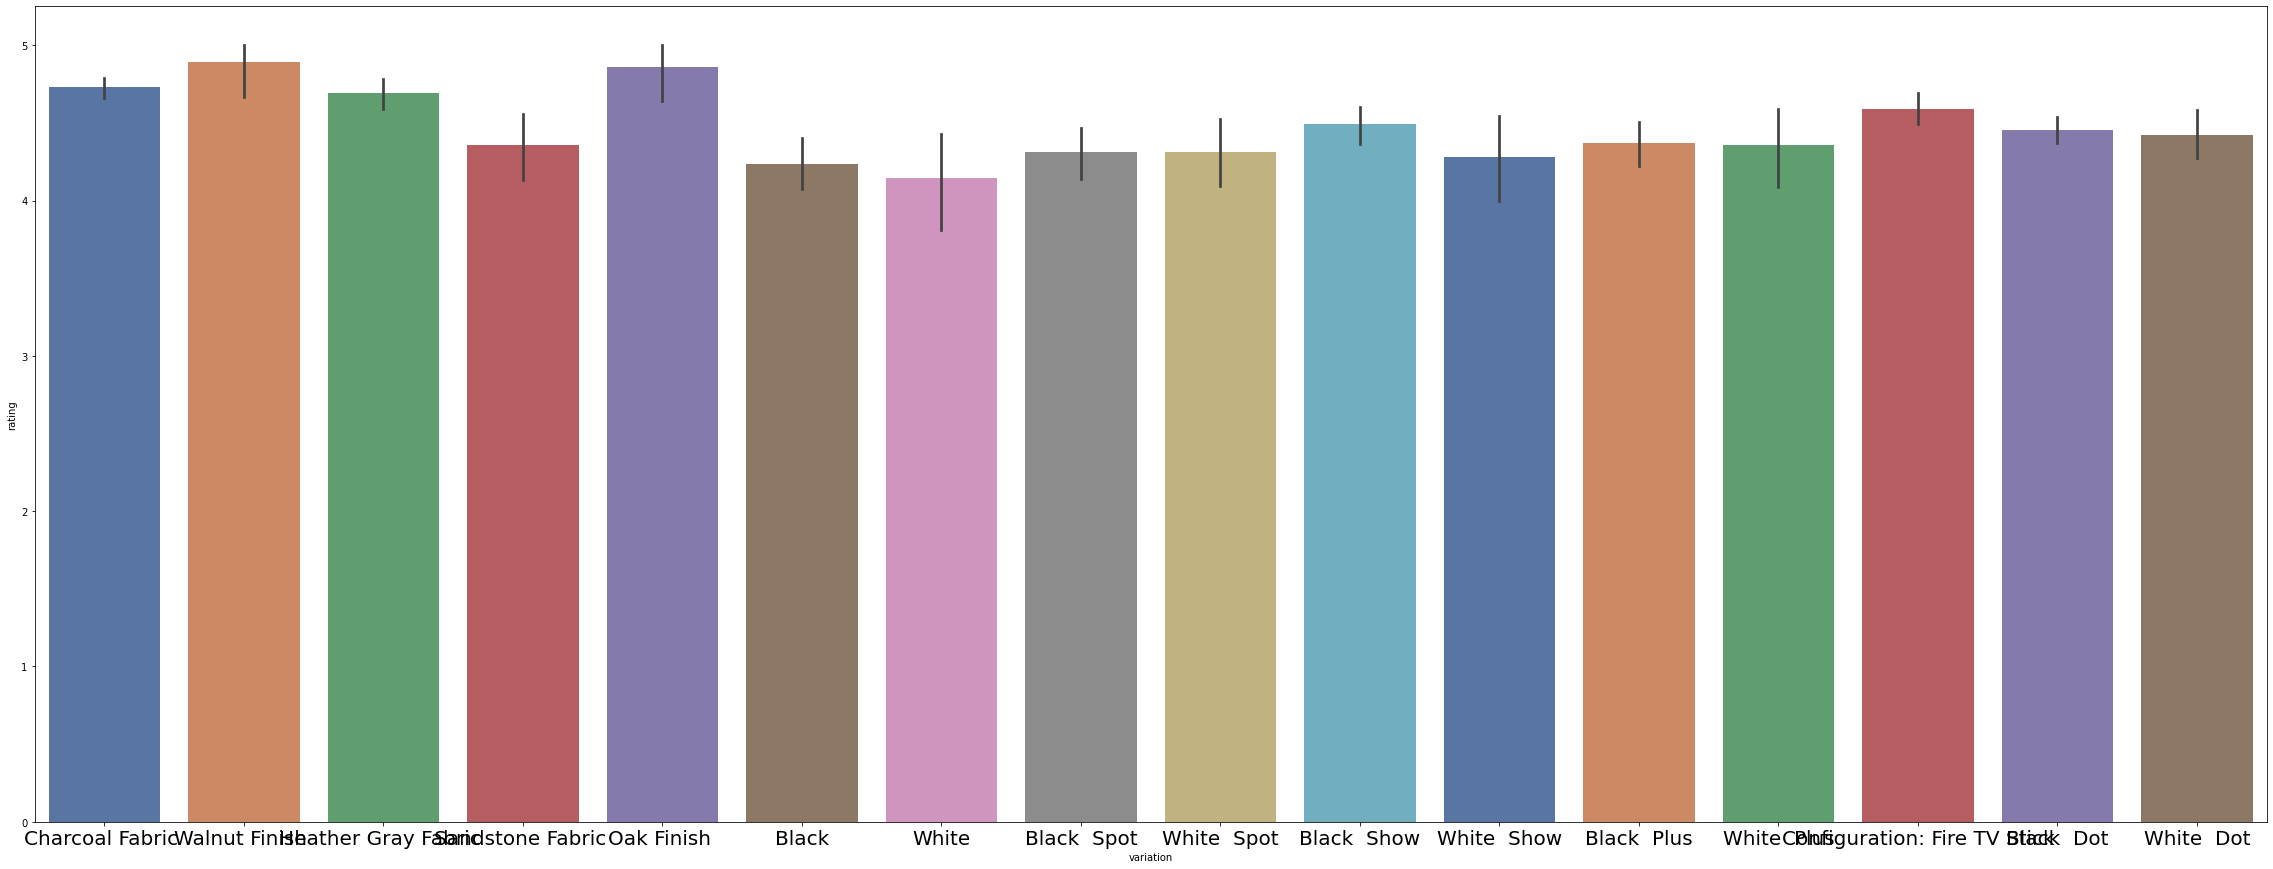

In [28]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data = reviews_df, palette = 'deep')
plt.rc('xtick', labelsize=15) 

**Comment:** It seems that the white variation had the most negative customer feedback while the Oak Finish and Walnut Finish had the most positive. 